In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plat
import seaborn as sns

# # A. DATA SET SALES

# # 1 ANALISIS DESKRIPTIF

In [3]:
df1 = pd.read_csv("D:/CODE/GELAR RASA/sales.csv")

# #1. a. Penjualan tahunan setiap produk dalam periode 2021-2023

In [4]:
# Mengelompokan berdasarkan ProductId dan Year, yang kemudian dijumlahkan Sales Amount-nya untuk setiap tahunnya
annual_sales_per_product = df1.groupby(['ProductID', 'Year'])['Sales Amount (in US$)'].sum().reset_index()

for product in annual_sales_per_product['ProductID'].unique():
    product_sales = annual_sales_per_product[annual_sales_per_product['ProductID'] == product]
    print(f"Total Annual Sales for Product {product}:")
    print(product_sales)
    print("\n")

Total Annual Sales for Product F3030:
  ProductID  Year  Sales Amount (in US$)
0     F3030  2021                 998400
1     F3030  2022                 605800
2     F3030  2023                 981500


Total Annual Sales for Product F3031:
  ProductID  Year  Sales Amount (in US$)
3     F3031  2021                 639000
4     F3031  2022                 725000
5     F3031  2023                 735000


Total Annual Sales for Product F3032:
  ProductID  Year  Sales Amount (in US$)
6     F3032  2021                 499800
7     F3032  2022                 310800
8     F3032  2023                 513800


Total Annual Sales for Product S2020:
   ProductID  Year  Sales Amount (in US$)
9      S2020  2021                1965000
10     S2020  2022                1458000
11     S2020  2023                2109000


Total Annual Sales for Product S2021:
   ProductID  Year  Sales Amount (in US$)
12     S2021  2021                1144000
13     S2021  2022                1020000
14     S2021  20

# # 1. b. Rata-rata penjualan berdasarkan kategori pelanggan

In [5]:
# Membuat dataframe yang nanti digunakan sebagai kategori pembeli
kategori = pd.DataFrame({
    'CustomerID': ['R012', 'F034', 'R056', 'R078'],
    'CustomerType': ['Retailer', 'Farm', 'Retailer', 'Farm'],
    'Size': ['Big', 'Big', 'Medium', 'Medium'],
    'Location': ['Iowa', 'Illinois', 'Indiana', 'Nebraska'],
    'Subsidized': ['No', 'No', 'No', 'Yes']
})

# Menggabungkan data penjualan dari dataframe kategori yang berdasarkan karakteristik pembeli
merged_data = pd.merge(df1, kategori, on = 'CustomerID')

Berdasarkan CustomerType

In [6]:
# Menghitung rata-rata penjualan berdasarkan CustomerType
avg_sales_by_type = merged_data.groupby('CustomerType')['Sales Amount (in US$)'].mean()

print("Rata-rata berdasarkan tipe konsumen:")
for index, value in avg_sales_by_type.items():
    print(f"{index}: {value}$")

Rata-rata berdasarkan tipe konsumen:
Farm: 17301.41129032258$
Retailer: 16422.66401590457$


Berdasarkan Size

In [7]:
# Menghitung rata-rata penjualan berdasarkan Size
avg_sales_by_size = merged_data.groupby('Size')['Sales Amount (in US$)'].mean()

print("\nRata-rata berdasarkan ukuran pembelian:")
for index, value in avg_sales_by_size.items():
    print(f"{index}: {value}$")


Rata-rata berdasarkan ukuran pembelian:
Big: 25660.557768924304$
Medium: 7968.812877263582$


Berdasarkan Subsidized

In [8]:
# Menghitung rata-rata penjualan berdasarkan Subsidized
avg_sales_by_subsidized = merged_data.groupby('Subsidized')['Sales Amount (in US$)'].mean()

print("\nRata-rata berdasarkan status subsidi:")
for index, value in avg_sales_by_subsidized.items():
    print(f"{index}: {value}$")


Rata-rata berdasarkan status subsidi:
No: 19725.0$
Yes: 7541.276595744681$


# # 1. c. Menampilkan SalesRepID dengan penjualan teratas (top 3)


In [9]:
# Mengelompokan berdasarkan SalesRepID dan menjumlahkan Sales Amount untuk setiap SalesRepId
total_sales_per_rep = df1.groupby('SalesRepID')['Sales Amount (in US$)'].sum().reset_index()

# Mengurutkan berdasarkan yang tertinggi dan hanya mengambil 3
top_3_sales_reps = total_sales_per_rep.sort_values(by='Sales Amount (in US$)', ascending=False).head(3)

# Menampilkan hasil top_3_sales_reps
print("Top 3 Sales Representatives based on Total Sales:")
print(top_3_sales_reps)

Top 3 Sales Representatives based on Total Sales:
  SalesRepID  Sales Amount (in US$)
3     BC1984                3585400
0     AA1986                3522300
6     DD1988                3223900


# # 2 VISUALISASI DATA

# # 2. a. Total penjualan untuk setiap produk  berdasarkan jenis pelanggan.

![WhatsApp Image 2024-11-14 at 16.00.17_dc697538.jpg](<attachment:WhatsApp Image 2024-11-14 at 16.00.17_dc697538.jpg>)
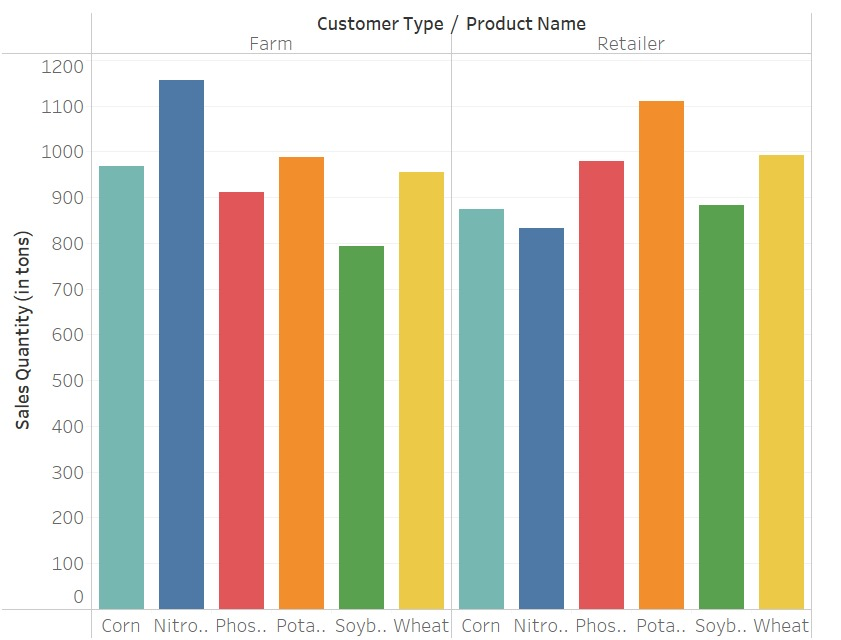

# # 2. b. Proporsi total penjualan menurut jenis pelanggan untuk setiap bulan dalam setahun


![WhatsApp Image 2024-11-14 at 15.59.31_9d6631da.jpg](<attachment:WhatsApp Image 2024-11-14 at 15.59.31_9d6631da.jpg>)
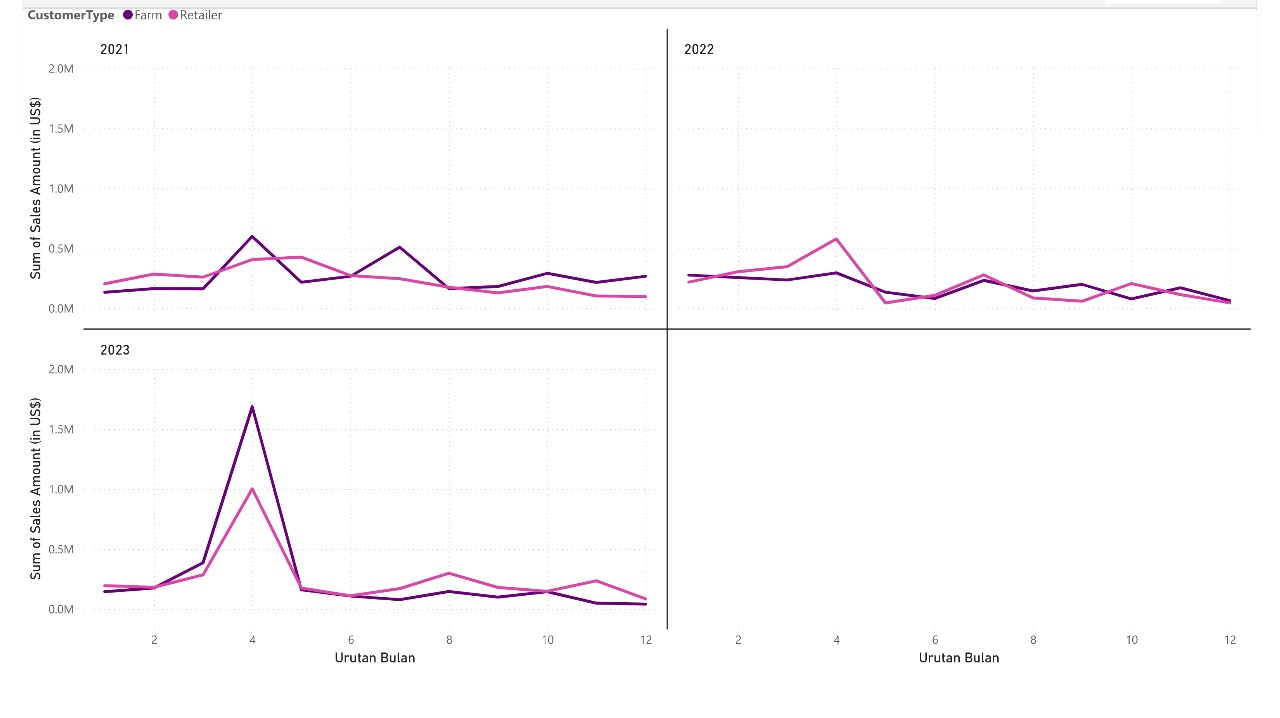

# # 2. c. Kinerja penjualan dari tiga perwakilan penjualan teratas selama periode pelaporan tiga tahun

![WhatsApp Image 2024-11-14 at 15.59.31_2745d316.jpg](<attachment:WhatsApp Image 2024-11-14 at 15.59.31_2745d316.jpg>)
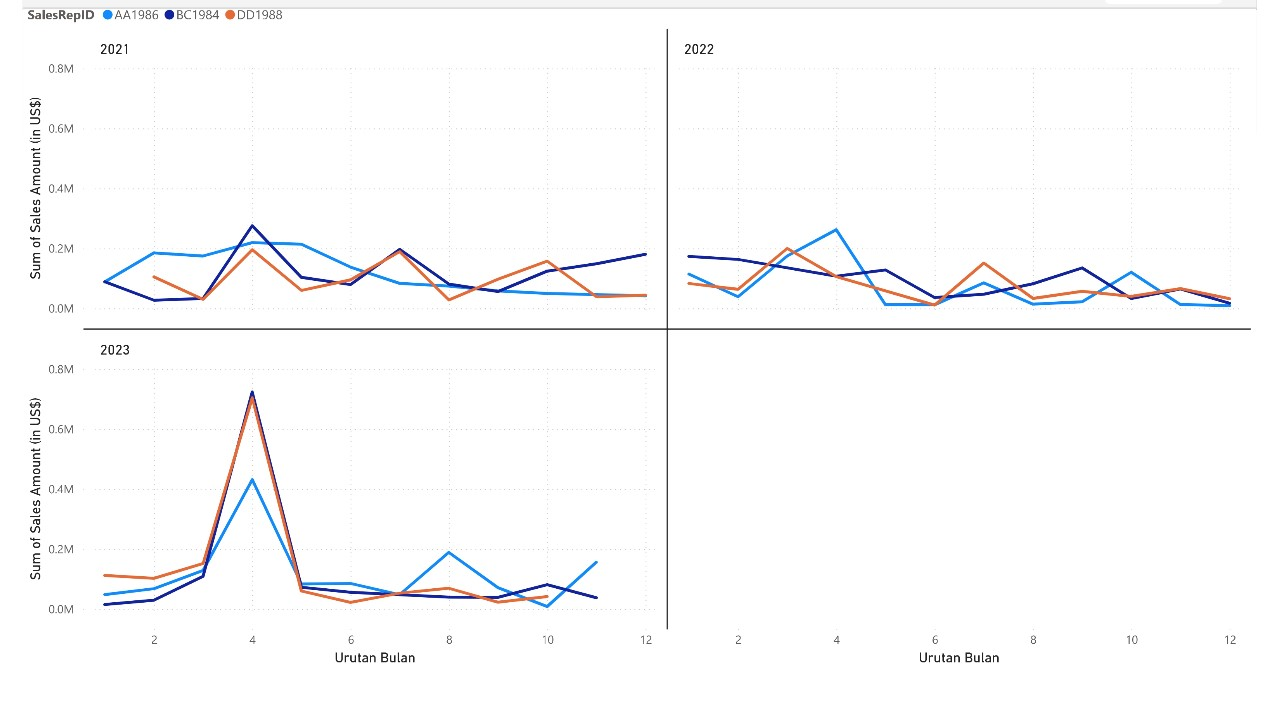

# # 3 ANALISIS & PELAPORAN



Berdasarkan data penjualan yang telah dipaparkan, yang mencakup catatan penjualan selama 3 tahun di bidang bisnis pertanian dan perkebunan, terkhusus pada pupuk yang diwakili letter F,dan bibit yang diwakili letter S. Diketahui dari keenam produk, bahwa penjualan tertinggi tercatat dipegang oleh S2020 dengan rata rata penjualan $2,109,000 dalam rentang 3 tahun kendati mengalami penurunan pada tahun 2022, begitu pula dengan F3030, dan F3032 yang menunjukkan pemulihan dari kemerosotan pada tahun 2022. Sebaliknya, F3031 harus menghadapi tantangan berupa penurunan penjualan atau stagnan pada tahun 2022-23, sehingga membutuhkan strategi khusus untuk meningkatkan daya tarik dan konsistensi penjualannya. Di sisi lain, Produk S2021 dan S2022 sempat mengalami fluktuasi, namun terdapat potensi untuk pulih apabila strategi yang tepat diterapkan dalam meraih konsumen.

Anggaplah jika perusahaan mengatur target penjualan demi meraih untung dengan minimal penjualan $850,000 per tahun. Dari data yang dipaparkan di atas, mungkin dapat diberikan evaluasi terhadap penjualan produk, terkhusus bagi yang belum memenuhi target dengan cara memahami tren penjualan produk dari tahun ke tahun. Dari visualisasi data data yang tersedia, diketahui bahwa penjualan produk selalu meningkat drastis dan mencapai titik maksimumnya pada bulan April, maka dengan ini sebaiknya penjual dapat melakukan sesuatu supaya penjualan dapat terdongkrak dengan maksud untuk memenuhi target, dan memaksimalkan keuntungan. 
Adapun cara yang dapat dilakukan untuk memanfaatkan momentum lonjakan tersebut adalah dengan menerapkan diskon, atau dengan membuat iklan terhadap produk produk yang belum memenuhi target, seperti misalnya F3031 dan F3032 yang masing masing rerata penjualan per tahunnya masih di bawah $850,000, yakni $735,000, dan  $513,800 sehingga konsumen dapat tertarik untuk membeli, dan mencoba produk yang ditawarkan. Adapun juga untuk produk produk yang mengalami Fluktuasi dan Stagnan, strategi yang dapat diterapkan untuk mengatasi masalah tersebut adalah dengan mengontrol kualitas dan meningkatkan konsistensi dalam penjualan, sehingga rating penjualan dapat berada di angka yang stabil.

# # B. DATA SET FRAUD

In [10]:
df2 = pd.read_csv('D:/CODE/GELAR RASA/fraud.csv')
df2.info()
df2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14446 entries, 0 to 14445
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   trans_date_trans_time  14446 non-null  object 
 1   merchant               14446 non-null  object 
 2   category               14446 non-null  object 
 3   amt                    14446 non-null  float64
 4   city                   14446 non-null  object 
 5   state                  14446 non-null  object 
 6   lat                    14446 non-null  float64
 7   long                   14446 non-null  float64
 8   city_pop               14446 non-null  int64  
 9   job                    14446 non-null  object 
 10  dob                    14446 non-null  object 
 11  trans_num              14446 non-null  object 
 12  merch_lat              14446 non-null  float64
 13  merch_long             14446 non-null  float64
 14  is_fraud               14446 non-null  object 
dtypes:

,amt,lat,long,city_pop,merch_lat,merch_long
count,14446.000000,14446.000000,14446.000000,1.444600e+04,14446.000000,14446.000000
mean,124.430073,39.787692,-110.874225,1.065370e+05,39.787991,-110.874892
std,231.352587,5.317039,12.985813,2.902916e+05,5.360593,12.995596
min,1.000000,20.027100,-165.672300,4.600000e+01,19.032689,-166.670685
25%,12.080000,36.715400,-120.415800,4.930000e+02,36.794655,-120.146253
50%,51.520000,39.666200,-111.098500,1.645000e+03,39.620953,-111.192629
75%,101.030000,41.940400,-101.136000,3.543900e+04,42.275740,-100.446822
max,3261.470000,66.693300,-89.628700,2.383912e+06,67.510267,-88.646366


In [11]:
# df2.isna().sum()

In [12]:
# # Features and target
# X = df2.drop('is_fraud', axis=1)  # Features
# y = df2['is_fraud']  # Target (Outcome)

In [13]:
# One-hot encode categorical features
# X = pd.get_dummies(X, drop_first=True)  # This will encode all categorical variables into numerical form

In [14]:
# Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [15]:
# Standardize the numerical features
# scaler = StandardScaler()
# X_train_scaled = scaler.fit_transform(X_train)  # Apply fit_transform to training data
# X_test_scaled = scaler.transform(X_test)  # Apply transform to test data (without fitting)


In [16]:
# # Train the Logistic Regression model
# model = LogisticRegression()
# model.fit(X_train_scaled, y_train)

In [17]:
# # Make predictions
# y_pred = model.predict(X_test_scaled)
# # y_pred_prob = model.predict_proba(X_test)[:, 1]

# cm = confusion_matrix(y_test, y_pred)

In [18]:
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
# disp.plot(cmap=plat.cm.Blues)
# plat.show()

In [19]:
# Evaluate the model
# accuracy = accuracy_score(y_test, y_pred)
# class_report = classification_report(y_test, y_pred)

In [20]:
# # Output the results
# print("Classification Report:")
# print(f"Accuracy: {accuracy}")
# print(class_report)

In [21]:
# # Confusion Matrix
# conf_matrix = confusion_matrix(y_test, y_pred)
# plat.figure(figsize=(6, 4))
# sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
# plat.xlabel('Predicted')
# plat.ylabel('Actual')
# plat.title('Confusion Matrix')
# plat.show()

In [22]:
# target_column = 'amt'  # Use the correct column name from the dataset

# # # Standardize the numerical columns
# # scaler = StandardScaler()
# # numerical_columns = ['city_pop', 'lat', 'long', 'merch_lat', 'merch_long', 'amt']
# # df2[numerical_columns] = scaler.fit_transform(df2[numerical_columns])

# # # Encoding categorical variables
# # df2 = pd.get_dummies(df2, drop_first=True)

# # # Split the data into features (X) and target (y)
# # X = df2.drop(target_column, axis=1)  # Drop the correct target column
# # y = df2[target_column]  # The actual target column

# # # Split the dataset into training and testing sets
# # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # # Train a Linear Regression model (as an example)
# # model = LinearRegression()
# # model.fit(X_train, y_train)

# # # Make predictions
# # y_pred = model.predict(X_test)

# # # Evaluate the model
# # mse = mean_squared_error(y_test, y_pred)
# # print(f"Mean Squared Error: {mse}")

In [23]:
# scaler = StandardScaler()
# numerical_columns = ['city_pop','lat','long','merch_lat','merch_long','amt']  # Replace with actual column names
# df2[numerical_columns] = scaler.fit_transform(df2[numerical_columns])

# # Encoding categorical variables
# df2 = pd.get_dummies(df2, drop_first=True)  # One-hot encode categorical variables

# # Split the df2 into features (X) and target (y)
# X = df2.drop('CreditCardBill', axis=1)  # Features
# y = df2['CreditCardBill']  # Target


In [24]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# lin_reg = LinearRegression()
# lin_reg.fit(X_train, y_train)

# # Example: Random Forest Regressor
# rf_reg = RandomForestRegressor(random_state=42)
# rf_reg.fit(X_train, y_train)

# # Predictions on the test set
# y_pred_lin = lin_reg.predict(X_test)
# y_pred_rf = rf_reg.predict(X_test)

# # Evaluate the models using Mean Squared Error (MSE)
# mse_lin = mean_squared_error(y_test, y_pred_lin)
# mse_rf = mean_squared_error(y_test, y_pred_rf)

# print(f"Linear Regression MSE: {mse_lin}")
# print(f"Random Forest MSE: {mse_rf}")

In [26]:
# # Get feature importances from Random Forest
# feature_importances = pd.Series(rf_reg.feature_importances_, index=X.columns)
# feature_importances = feature_importances.sort_values(ascending=False)

# # Plot the feature importance
# feature_importances.plot(kind='bar')
# plt.title('Feature Importance')
# plt.show()

# # 1 MODEL PREDIKSI JUMLAH TAGIHAN KARTU KREDIT

In [27]:
df2.head(), df2.columns

numeric_columns = df2[['amt', 'city_pop', 'lat', 'long', 'merch_lat', 'merch_long']]
correlation_matrix = numeric_columns.corr()

correlation_matrix['amt'].sort_values(ascending=False)

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X = df2[['city_pop', 'lat', 'long', 'merch_lat', 'merch_long']]
y = df2['amt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(np.float64(54902.43867652684), -0.0006691437309571668)

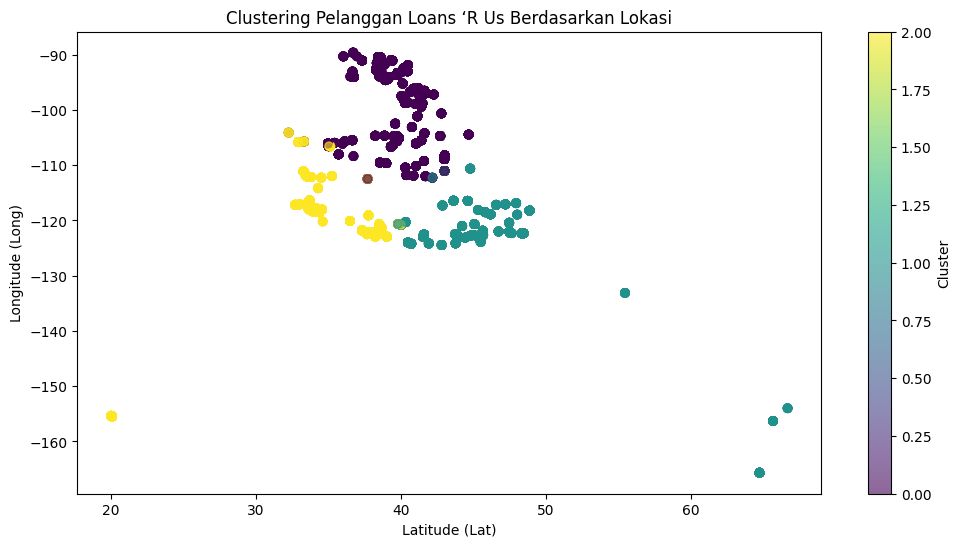

,amt,lat,long,city_pop,merch_lat,merch_long
Cluster,,,,,,
0,122.002301,39.660904,-100.402242,44243.913609,39.659593,-100.403091
1,135.708916,45.937867,-122.730936,40034.164438,45.967328,-122.731640
2,118.732869,34.614272,-118.559613,272401.368172,34.591782,-118.559936


In [31]:
df2.head(), df2.columns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

features = df2[['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']]


features = features.dropna()

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

features['Cluster'] = clusters

plt.figure(figsize=(12, 6))
plt.scatter(features['lat'], features['long'], c=features['Cluster'], cmap='viridis', alpha=0.6)
plt.xlabel('Latitude (Lat)')
plt.ylabel('Longitude (Long)')
plt.title('Clustering Pelanggan Loans ‘R Us Berdasarkan Lokasi')
plt.colorbar(label='Cluster')
plt.show()

cluster_summary = features.groupby('Cluster').mean()

cluster_summary

In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report

# Menghapus spasi atau karakter tambahan dari kolom 'is_fraud'
df2['is_fraud'] = df2['is_fraud'].str.extract(r'(\d+)')
df2['is_fraud'] = pd.to_numeric(df2['is_fraud'], errors='coerce')

# Mengatasi missing values
df2.dropna(subset=['is_fraud'], inplace=True)
df2['is_fraud'] = df2['is_fraud'].astype(int)

# Memilih fitur dan target
X = df2[['amt', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']]
y = df2['is_fraud']

# Membagi dataset menjadi data pelatihan dan pengujian dengan stratifikasi
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Inisialisasi model
knn_model = KNeighborsClassifier(n_neighbors=5)
nb_model = GaussianNB()

# Melatih model
knn_model.fit(X_train, y_train)
nb_model.fit(X_train, y_train)

# Membuat prediksi
knn_predictions = knn_model.predict(X_test)
nb_predictions = nb_model.predict(X_test)

# Evaluasi model
knn_cm = confusion_matrix(y_test, knn_predictions)
knn_report = classification_report(y_test, knn_predictions)

nb_cm = confusion_matrix(y_test, nb_predictions)
nb_report = classification_report(y_test, nb_predictions)

# Menampilkan hasil
print("Confusion Matrix - KNN:\n", knn_cm)
print("Classification Report - KNN:\n", knn_report)
print("Confusion Matrix - Naïve Bayes:\n", nb_cm)
print("Classification Report - Naïve Bayes:\n", nb_report)

Confusion Matrix - KNN:
 [[2452   69]
 [ 111  258]]
Classification Report - KNN:
               precision    recall  f1-score   support

           0       0.96      0.97      0.96      2521
           1       0.79      0.70      0.74       369

    accuracy                           0.94      2890
   macro avg       0.87      0.84      0.85      2890
weighted avg       0.94      0.94      0.94      2890

Confusion Matrix - Naïve Bayes:
 [[2469   52]
 [ 182  187]]
Classification Report - Naïve Bayes:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95      2521
           1       0.78      0.51      0.62       369

    accuracy                           0.92      2890
   macro avg       0.86      0.74      0.78      2890
weighted avg       0.91      0.92      0.91      2890



# # 2 MODEL CLUSTERING

# # 3 MODEL KLASIFIKASI